- Name:  Ioan-Radu Bocu 
- Student number:  s1104958
- Name:  Ioan-Stefan Roman 
- Student number:  s1096637

<h1 style="font-weight: bold;">Data Mining Project</h1>

<h2> Predictive Analytics for Crime Hotspots in Los Angeles: A Data-Driven Approach to Identifying High-Risk Areas </h2>

Criminality is a major problem that our society still faces. Crimes have been taking place since the ancient times. Back then, the number of crimes was much higher due to various reasons such as : 
social factors, economic factors, the lack of involvement from authorities, lack of logistical means to prevent crimes and so on. Once with the evolution of the mankind, the social and economic factors have significantly improved, fact which lead to a significant decrease in criminality. However, this issue has not been completely eradicated since there are more vulnerable part of the world, where the economy is collapsing(Venezuela, Guatemala, El Salvador) or the majority 
of the population is deprived of basic education, fact which does not provide the ordinary individual to earn his living. Of course, there existed prosperous countries which were ruined by internal or external wars, fact which lead to a rise in the criminality toward civilian population.



Now we are going to analyse the criminality of one of the most famous and prosperous cities in 
the world, Los Angeles (U.S.A). This major city finds it self in the S-W of U.S.A, on the American 
West Coast, precisely in the state of California. Los Angeles has a population of  almost 4 million 
Inhabitants. It is an extremely pleasant city to spend your holiday, but there is still one problem
persisting : high criminality. The reasons that underly this significant issue are : the huge population, illegal immigration from Latin America, drug trafficking, gun trafficking and so on.


We have obtained the data base which contains all the crime records from L.A taking place since 
2020. This is a link to our database : https://catalog.data.gov/dataset/crime-data-from-2020-to-present

<h2 style="font-weight: bold;">Introduction to our Dataset</h2>

Our Database contains the following attributes: 

- **DR_NO**: This is the report number, a unique identifier for the incident report  
- **DATE RPTD**: The date the incident was reported  
- **DATE OCC**: The date the incident occurred  
- **TIME OCC**: The time the incident occurred  
- **AREA**: The code for the geographic area where the incident took place  
- **AREA NAME**: The name of the area where the incident took place  
- **Rpt Dist No**: The reporting district number of the police department where the crime was reported 
- **Part 1-2**: Indicates whether the incident is classified as Part 1 or Part 2 crime. Part 1 crimes are more serious  
- **Crm Cd**: The code for the primary crime committed  
- **Crm Cd Desc**: A description of the primary crime  
- **Mocodes**: Modus operandi codes, which describe the method used to commit the crime  
- **Vict Age**: The age of the victim  
- **Vict Sex**: The gender of the victim  
- **Vict Descent**: The ethnic or racial descent of the victim  
- **Premis Cd**: The code for the type of premises where the crime occurred  
- **Premis Desc**: A description of the premises  
- **Weapon Used Cd**: The code for any weapon used during the crime  
- **Weapon Desc**: A description of the weapon used  
- **Status**: The current status of the case (e.g., open, closed, under investigation)  
- **Status Desc**: A description of the case status  
- **Crm Cd 1-4**: Additional crime codes for up to four secondary crimes associated with the incident  
- **LOCATION**: The specific location where the incident occurred  
- **Cross Street**: The intersecting street near the location of the incident  
- **LAT, LON**: The latitude and longitude coordinates of the incident location


First, in order to illustrate more the preprocessing method that our dataset has gone through, we will dedicate a 
Data Exploration Part. 

<h2>Data Exploration</h2> 

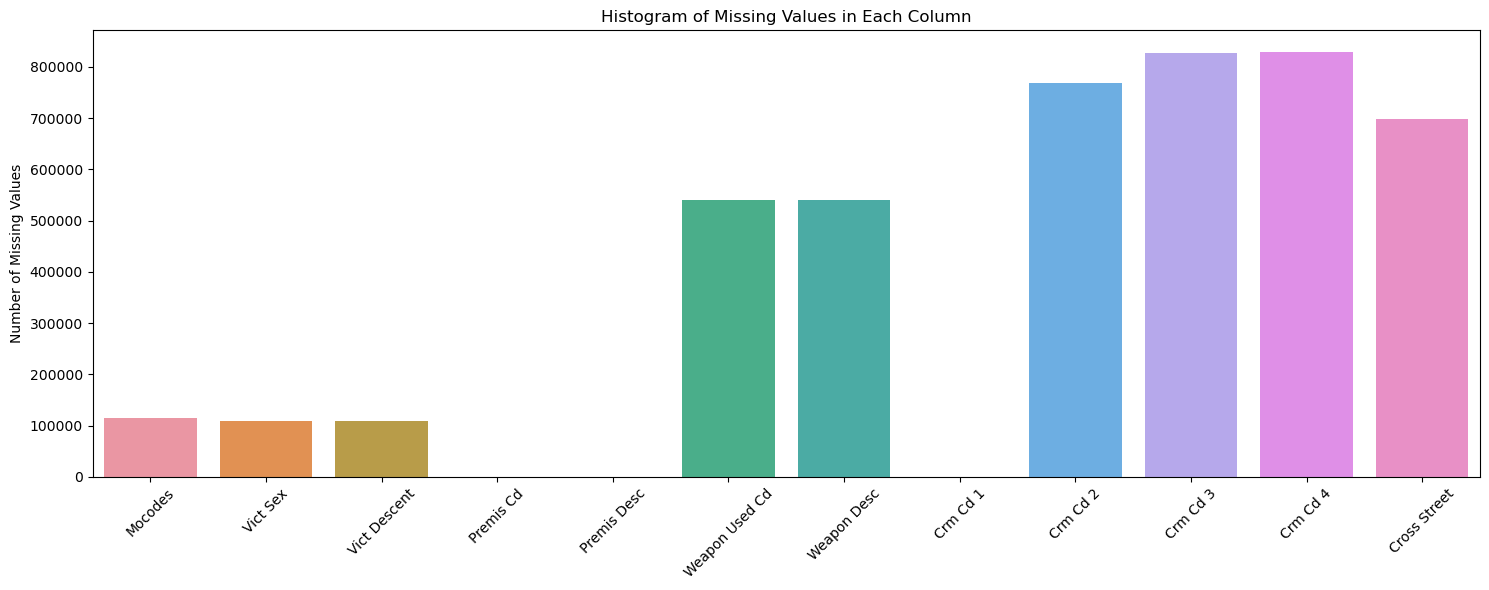

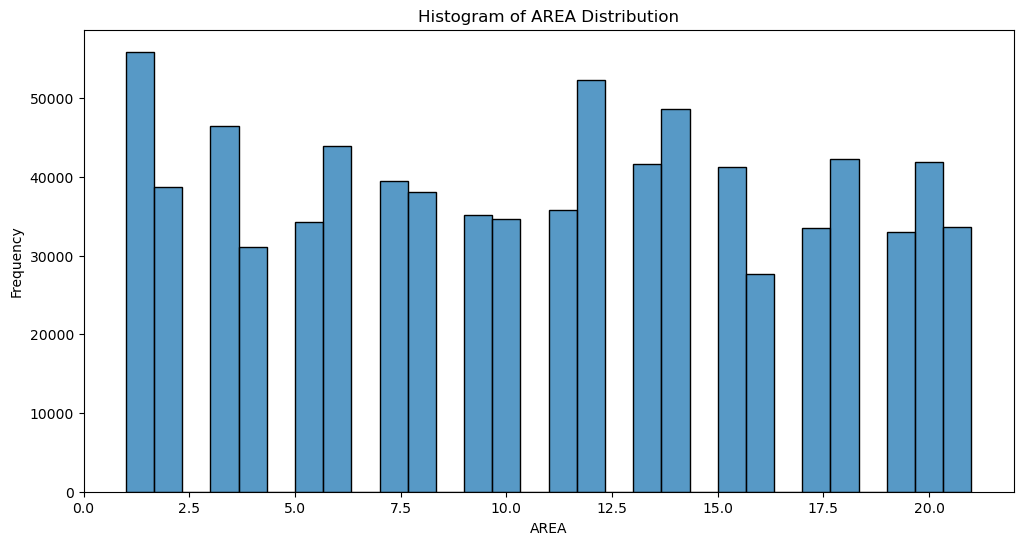

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data
data = pd.read_csv('crime_data.csv', delimiter=';')

# Calculating missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plotting histograms for columns with missing values
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in Each Column')
plt.tight_layout()

# Show the plot for missing values
plt.show()

# Plotting histogram for the 'AREA' attribute
plt.figure(figsize=(12, 6))
sns.histplot(data['AREA'], kde=False, bins=30)  # You can adjust the number of bins
plt.xlabel('AREA')
plt.ylabel('Frequency')
plt.title('Histogram of AREA Distribution')
plt.show()


<h3>Histogram of Missing Values in Each Column</h3>

To start with, we created a histogram displaying the columns that contain missing values. The reason we did this is to know how to start the preprocessing proedure. As far as it can be seen, the attributes that present the most missing values are : "Crm Cd 2", "Crm Cd 3", "Crm Cd 4" and "Cross Street". The remaining attributes present a lower proportion of missing values. There will be, of course a case distinciton between the attrinutes in terms of the number of missing values within the preprocessing part. Two methods will be applied : imputing and dropping columns with missing values. 

<h3>Histogram of Area Distribution</h3> 

As the target attribute when constructing the Machine Learning Algorithms is "AREA", we wanted to see how this attribute is distributed among our dataset. As far as it can be seen, the highest number of crimes is registered in area 1 of Los Angeles. Thereofore, this is the most dangereous are withih LA. The safest area in Los Angeles is 
area 16. This can be maybe an indicator for the population to avoid certain areas of the city. 


<h2 style="font-weight: bold;">The Identification of time patterns within our data set</h2>


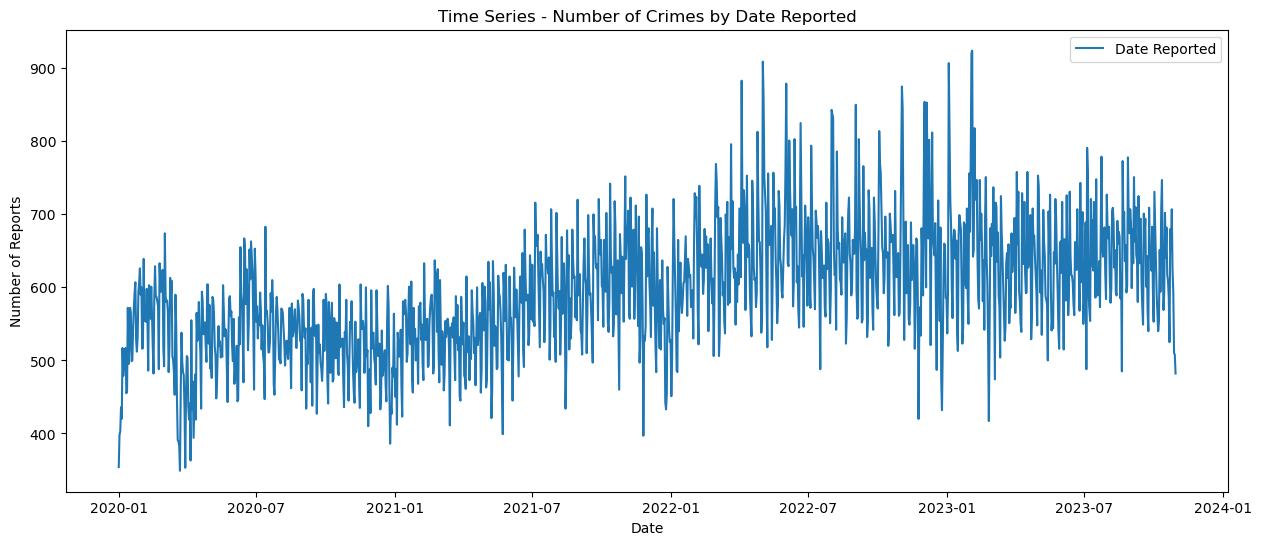

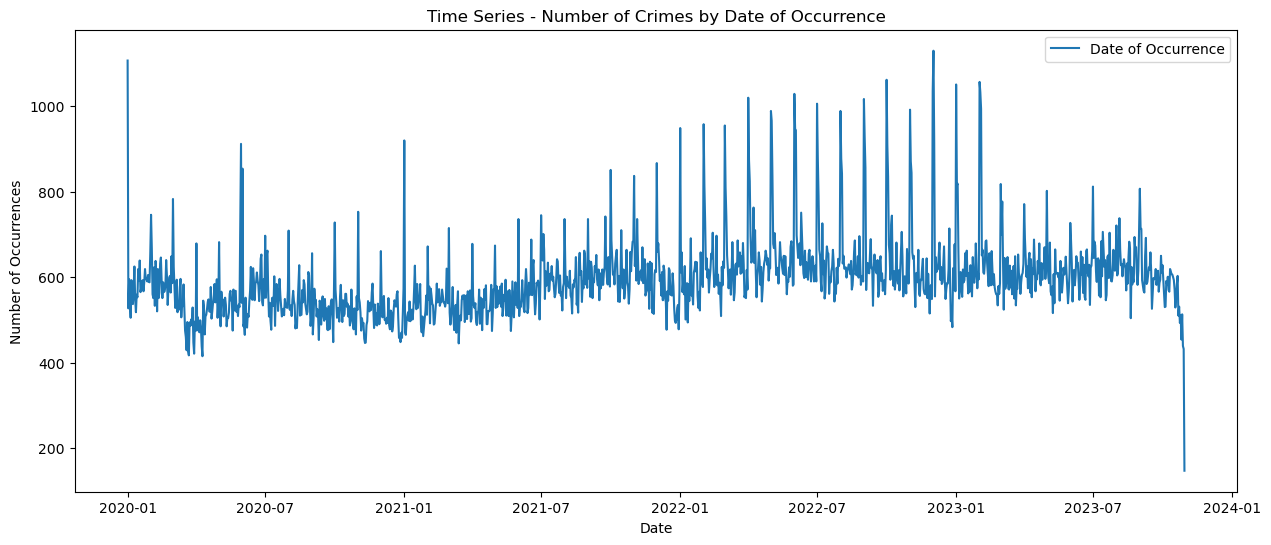

In [2]:
# Time Series Analysis
# Grouping by date and counting occurrences

# Converting the time-stamped columns to datetime objects
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

date_rptd_counts = data['Date Rptd'].dt.date.value_counts().sort_index()
date_occ_counts = data['DATE OCC'].dt.date.value_counts().sort_index()

# Plotting time series for 'Date Rptd'
plt.figure(figsize=(15, 6))
plt.plot(date_rptd_counts, label='Date Reported')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.title('Time Series - Number of Crimes by Date Reported')
plt.legend()
plt.show()

# Plotting time series for 'DATE OCC'
plt.figure(figsize=(15, 6))
plt.plot(date_occ_counts, label='Date of Occurrence')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Time Series - Number of Crimes by Date of Occurrence')
plt.legend()
plt.show()

<h3 style="font-weight: bold;">Interpretation of Time Patterns</h3>

Above, we have built 2 plots that both show how the number of the crimes (both occurring as well as being reporting)evolve . There are a lot of spikes in our data, in both plots. The period after 2023-01 seems to have one of the biggest spikes. One interesting fact, in the first plot (Number of Crimes of Date Reported), there seems to be an increase, not a huge increase, but a signficant one. This fact seems not to have a correlation with the second plot(Number of Crimes by Data of Occurrence), as the number of crimes occuring across a period of time is constant. This can be for example, because some crimes can be reported in a shorter amount of time than others. A theft if faster reported than a murder.  



<h2 style="font-weight: bold;">Personal information regarding the victim </h2>

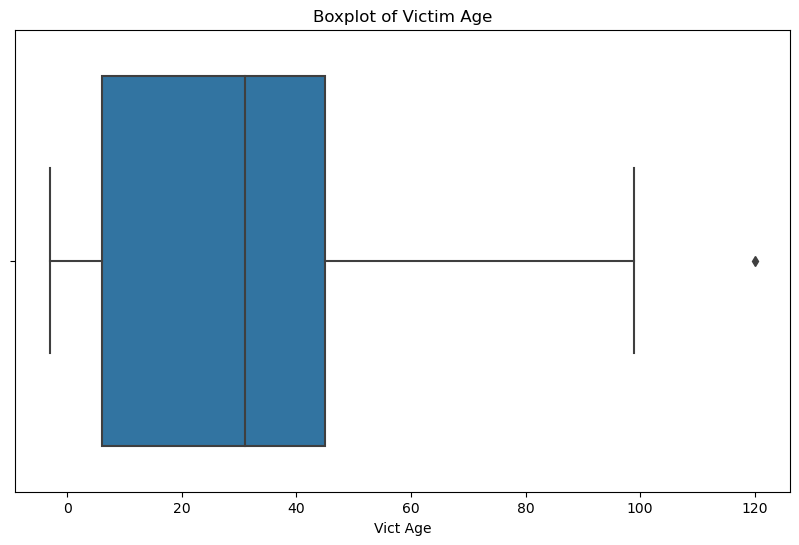

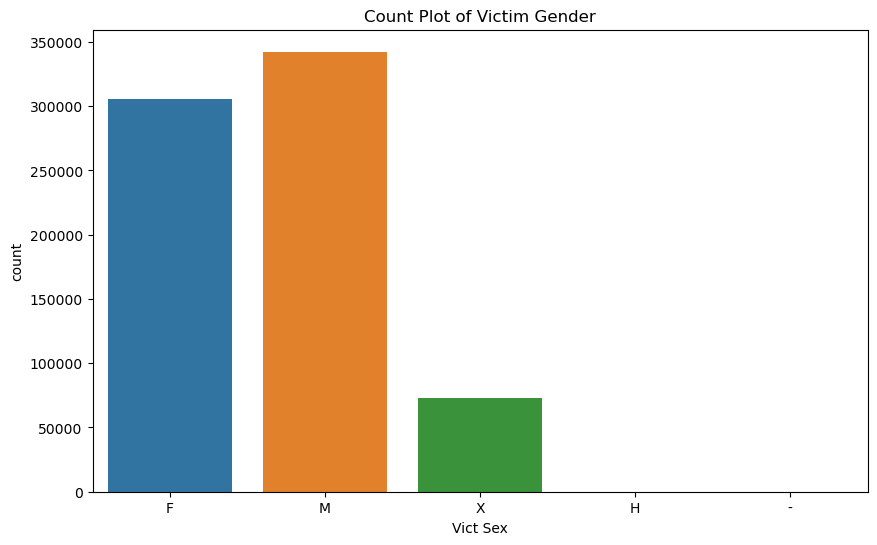

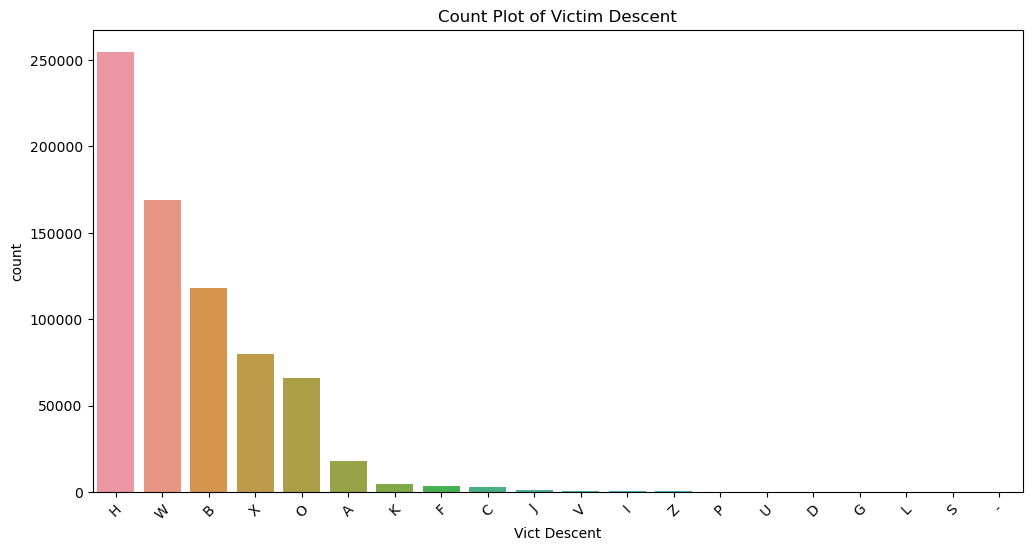

In [3]:
# Boxplot for 'Vict Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Vict Age'])
plt.title('Boxplot of Victim Age')
plt.show()

# Count plot for 'Vict Sex'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Vict Sex'])
plt.title('Count Plot of Victim Gender')
plt.show()

# Count plot for 'Vict Descent'
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Vict Descent'], order = data['Vict Descent'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count Plot of Victim Descent')
plt.show()

<h3 style="font-weight: bold;">Interpreting the personal information of the victims</h3>

<h4> Boxplot regarding the age of the victim </h4>

A striking fact that is revealed by the boxplot is that some people have a negative age. This inconsistnecy will be
taken into account in the preprocessing part. The median age shown by the boxplot is around 30 years old. It is quite worrying that first quartile is set at an age less than 10 years old. This should be a huge indicator for the local authorities to take measures to protect the children, as they represent the most vulnerable part of the local population. Also, from the box plot we can see that the 75% quartile is around 45 years old. The interquartile range is 45-10 = 35 years old. 

<h4> Count Plot of Victim Gender </h4>

This histogram shows that the most common people who are victims are men, despite the fact that women are not way less affected by crimes. 

<h4> Count Plot of Victim Descent </h4>

From this histogram it seems that Hispanic people suffer the most, as they are the most frequent victims. The other groups that are common victims in crimes are : white people, Afro-American people, Asian people, other group of people (O) and then American Natives. It is not surprising that Hispanic people have the most frequency, as they represent the the largest ethnic group in LA. Probably there is a lot of smuggling coming from Mexico and other illegal activities that are done in collaboration with the latin population already established in Los Angeles. 

<h2 style="font-weight: bold;">Building a histogram which shows the spread of the data regarding the Status of the victim </h2>

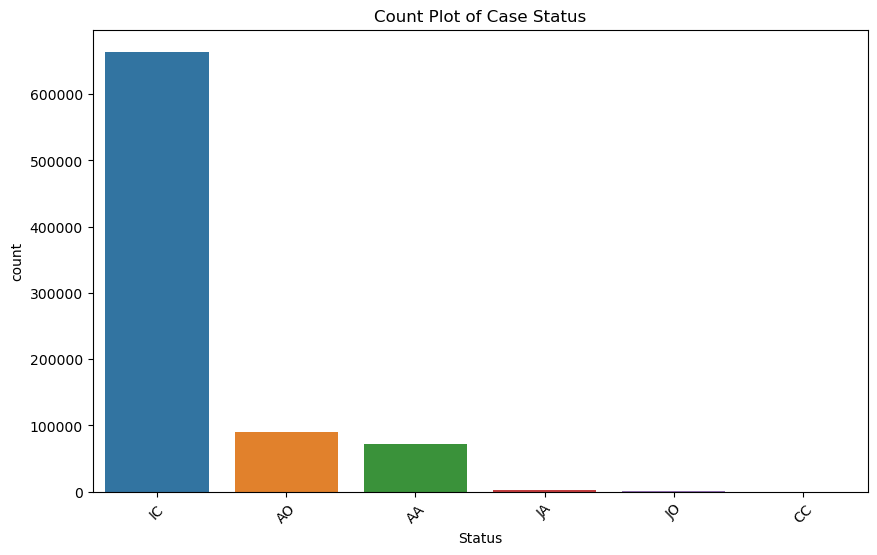

In [4]:
# Count plot for 'Status'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Status'], order = data['Status'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count Plot of Case Status')
plt.show()

<h3>Interpretation of the Status of the case</h3>
It seems that most cases are still under investigation (IC). The others were concluded with the arrest of the aggressor (AO,AA). It seems that there is a huge workload for the local police department of Los Angeles. Depending on the type of crime, some of them are easier to solve and conclude than others. More drastic crimes with a large number of criminals and casualties take more time to be concluded. Or maybe, some crimes remain open for a long period of time, with the hope that new evidence will appear. 

It quite clear by now, that LA is a large city, therefore it must allocate its resources wisely. So the most violent crimes should benefit from the largest number of resources. This leads to the fact that lower priority crimes will stay more time under investigation. 






In [5]:
num_negative_ages = (data['Vict Age'] < 0).sum()

print("Number of negative values in 'Vict Age':", num_negative_ages)

Number of negative values in 'Vict Age': 71


<h1>Preprocessing</h1> 

To start with, the crime record database contains irregularities that can be addressed such as: missing values. The 
first preprocessing method that we will apply is get rid of the missing values. As far we can see, there are a lot of
data objects whose main msiing values can be found accross a number of certain columns. We will drop the columns which
contain a large number of missing values.

<h2>Handling missing values </h2> 

Here, we have done a bit of a manual work in Excel where we have seen the following the following percentages of missing 
values within some columns,namely : 
    Crm Cd 4 :                           ~99.99%
    Crm Cd 3 :                           ~99.75%
    Crm Cd 2 :                           ~92.65%
    Cross Street:                        ~84.03%
    Weapon Used Cd and Weapon Desc :     ~65.13%
        
Seing these very large percentages in the columns mentioned above, it is easy to understand why these columns are
going to get dropped, as they anyway would not provide any signifant information in predicting task.

After dropping the columns with a large number of missing values, the remaining attributes within our database
are :
   - DR_NO  
- Date Rptd  
- DATE OCC  
- TIME OCC  
- AREA  
- AREA NAME  
- Rpt Dist No  
- Part 1-2  
- Crm Cd  
- Crm Cd Desc  
- Mocodes  
- Vict Age  
- Vict Sex  
- Vict Descent  
- Premis Cd  
- Premis Desc  
- Status  
- Status Desc  
- Crm Cd 1  
- LOCATION  
- LAT  
- LON

In [6]:
import pandas as pd 

# Dropping the unnecessary columns(attributes)
data = data.drop(columns = 'Crm Cd 4')
data = data.drop(columns = 'Crm Cd 3')
data = data.drop(columns = 'Crm Cd 2')
data = data.drop(columns = 'Cross Street')
data = data.drop(columns = 'Weapon Used Cd')
data = data.drop(columns = 'Weapon Desc')

#Display the first few rows after the removal of the columns 
data.head()



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


<h2>Removing Inconsistent Data</h2>

As far as we can see from the step that concerned the data exploration part, more specifically from the box plot showing the spread of the attribute "Vict Age" (this attribute gives the age of the victim), there are victims whose age is negative (the minimum age in box plot is negative). We cannot accept such entries, for the obvious reason that the age of a person is > 0. What we have done is simply removing these entries from our dataset. 

In [7]:
# Remove rows where 'Vict Age' is less than 0
data = data[data['Vict Age'] >= 0]

<h2>Imputing values </h2>
    
There are still columns with a significant number of missing values. For such columns, we will perform imputing. 
Imputing in terms of preprocessing refers to the process of replacing missing data with substituted values. When a
dataset has missing values, particularly if these are not randomly distributed, it can lead to biased estimates
and distort the result of any analysis or predictive modelling. 

The columns that are going to get imputed are : 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Premis Cd', 'Crm Cd 1'.
    
In the case of categorical columns such as 'Vict Sex', 'Vict Descent', 'Premis Desc', the missing values are replaced
with the mode (most frequent value) of the corresponding column.

In the case of numerical columns such as 'Premis Cd', 'Crm Cd 1', the missing values are replaced with the median
value. Here the imputing on the attributes mentioned earlier can affect the wat that the machine learning algorithms applied later will behave. This is because, imputing means creating artificial data, which we cannot assume that indeed this was the correct value to fill in. For instance, in the case of the categorical data, we filled the missing values with the mode of the correspondig attribute. This just increases the number of appearances of the most popular value withih an attribute. Hence, it results that the categorical data within our dataset will have a higher influence than the other attribute values.  

In [8]:
# Calculating median and mode
median_value_premis_cd = data['Premis Cd'].median()
median_value_crm_cd_1 = data['Crm Cd 1'].median()
mode_value_vict_sex = data['Vict Sex'].mode()[0]
mode_value_vict_descent = data['Vict Descent'].mode()[0]


# Filling missing values
data['Crm Cd 1'].fillna (median_value_crm_cd_1, inplace = True)
data['Premis Cd'].fillna(median_value_premis_cd, inplace=True)
data['Vict Sex'].fillna(mode_value_vict_sex, inplace=True)
data['Vict Descent'].fillna(mode_value_vict_descent, inplace = True)

# Check the data after filling missing values
data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


<h2>Converting the date-time columns to date time objects</h2>

After imputing the data which was a significant step within the preprocessing process, we will change the format of the data. We will convert our data columns (Date Rptd and DATE OCC) to date time objects. This tranformation is very beneficial as it allows a better manipulation of the data. For instance the date '01/08/2020 12:00:00 AM' becomes '2020-01-08'. The time (hour) is removed as it will not play any important role in our further analysis. 
After this conversion, we can easily extract components like year, month and day, which is much more complex with string or other data types. 

In [9]:

# extract additional date features such as year, month, day
data['Reported Year'] = data['Date Rptd'].dt.year
data['Occurred Year'] = data['DATE OCC'].dt.year
data['Reported Month'] = data['Date Rptd'].dt.month
data['Occurred Month'] = data['DATE OCC'].dt.month
data['Reported Day'] = data['Date Rptd'].dt.day
data['Occurred Day'] = data['DATE OCC'].dt.day

# Display the first few rows 
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,LOCATION,LAT,LON,Reported Year,Occurred Year,Reported Month,Occurred Month,Reported Day,Occurred Day
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,2020,1,1,8,8
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,700 S HILL ST,34.0459,-118.2545,2020,2020,1,1,2,1
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2020,4,2,14,13
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,2020,1,1,1,1
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,14400 TITUS ST,34.2198,-118.4468,2020,2020,1,1,1,1


<h2>Applying the One-Hot Encoding</h2> 

There are mainly two types of encoding techniques : One-Hot Encoding and Label Encoding 

One-Hot Encoding is usually used when there is no ordinal relationship in the categorical data and it 
creates a new binary column for each category in the original column.

Label Encoding assigns a unique integer to each category. This method can imply an ordinal relationship and
is best used when such a relation exists.

In our case, we have the following categorial columns : AREA NAME, Crm Cd Desc, Status Desc 
We will apply the One-Hot Encoding as this method is the most suitable for these columns

After running the piece of code from below, our original columns will be dropped and new columns will be created 
for each unique category in the specified columns. Each row will contain 1's and 0's for these new created columns.
The 1 and 0 indicate the presence, respectively the absence of the value.

In [10]:
# Select the columns to encode
categorical_cols = ['AREA NAME', 'Crm Cd Desc', 'Status', 'Vict Sex', 'Vict Descent']

# Apply One-Hot Encoding
encoded_data = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the new dataset
encoded_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,Vict Age,...,Vict Descent_K,Vict Descent_L,Vict Descent_O,Vict Descent_P,Vict Descent_S,Vict Descent_U,Vict Descent_V,Vict Descent_W,Vict Descent_X,Vict Descent_Z
0,10304468,2020-01-08,2020-01-08,2230,3,377,2,624,0444 0913,36,...,0,0,0,0,0,0,0,0,0,0
1,190101086,2020-01-02,2020-01-01,330,1,163,2,624,0416 1822 1414,25,...,0,0,0,0,0,0,0,0,0,0
2,200110444,2020-04-14,2020-02-13,1200,1,155,2,845,1501,0,...,0,0,0,0,0,0,0,0,1,0
3,191501505,2020-01-01,2020-01-01,1730,15,1543,2,745,0329 1402,76,...,0,0,0,0,0,0,0,1,0,0
4,191921269,2020-01-01,2020-01-01,415,19,1998,2,740,329,31,...,0,0,0,0,0,0,0,0,1,0


<h2>Subset feature selection</h2>

Here are selected the most relevant attributes which will be used to predict the AREA.
171 independent attributes will be used in the predictive process. The endoded versions of AREA NAME are
removed as it would not make sense to predict the area in terms of area data. 

In [11]:

# First we are going to drop the column Location as it provides some insights about the AREA in the predicting process
encoded_data = encoded_data.drop(columns = 'LOCATION')

# Dropping the Premis Desc, as we already have the columns Premis Cd which states the same thing
encoded_data = encoded_data.drop(columns = 'Premis Desc')

# Dropping drop this column , as it is hard to understand, having no relevence for predicting the area
encoded_data = encoded_data.drop(columns = 'Mocodes')

# Dropping the Status Desc, as we already have the column Status which states the same thing
encoded_data = encoded_data.drop(columns = 'Status Desc')

# Dropping the columns LAT and LONG as they both give the AREA
encoded_data = encoded_data.drop(columns = 'LAT')
encoded_data = encoded_data.drop(columns = 'LON')

# List all column names
all_columns = encoded_data.columns.tolist()

# Remove the columns that are one-hot encoded versions of 'AREA NAME'
area_name_encoded_cols = [col for col in all_columns if col.startswith('AREA NAME_')]
features_without_area_name = [col for col in all_columns if col not in area_name_encoded_cols]

# Select other relevant features 
relevant_features = ['TIME OCC', 'Vict Age'] + [col for col in features_without_area_name if col not in ['AREA NAME', 'Crm Cd Desc', 'Status Desc']]

# Create a new DataFrame with the selected features
selected_features_data = encoded_data[relevant_features]


# Display the first few rows of the dataset with selected features
selected_features_data.head()



,TIME OCC,Vict Age,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Descent_K,Vict Descent_L,Vict Descent_O,Vict Descent_P,Vict Descent_S,Vict Descent_U,Vict Descent_V,Vict Descent_W,Vict Descent_X,Vict Descent_Z
0,2230,36,10304468,2020-01-08,2020-01-08,2230,3,377,2,624,...,0,0,0,0,0,0,0,0,0,0
1,330,25,190101086,2020-01-02,2020-01-01,330,1,163,2,624,...,0,0,0,0,0,0,0,0,0,0
2,1200,0,200110444,2020-04-14,2020-02-13,1200,1,155,2,845,...,0,0,0,0,0,0,0,0,1,0
3,1730,76,191501505,2020-01-01,2020-01-01,1730,15,1543,2,745,...,0,0,0,0,0,0,0,1,0,0
4,415,31,191921269,2020-01-01,2020-01-01,415,19,1998,2,740,...,0,0,0,0,0,0,0,0,1,0


<h2>Scaling</h2>

One technique for standardising the range of independent variables or data features is scaling. In other words, the process involves modifying the data's scale to enable consistent comparisons of various variables.

For instance (not related to this dataset)
If you have 2 attributes, weight measured in kilograms and height measured in mm. As the height measured in mm
usually contains really high values, it will contribute much more in the predicitng process despite the fact that 
it is not a more important attribute than weight.

As now, we have selected the features that will play a role in the machine learning algorithms. We want be sure that these values can be treated equally when predicting the dependent variable. Scaling will make this possible,
after applying it, the values within the selected columns can be compared from equal to equal. 

Therefore , this step prepared our selected features for the prediction process. 

In [12]:
from sklearn.preprocessing import StandardScaler


# Identifying numerical columns
numerical_cols = ['TIME OCC', 'Vict Age']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
selected_features_data.loc[:, numerical_cols] = scaler.fit_transform(selected_features_data[numerical_cols])

# Display the scaled data
selected_features_data.head()

/var/folders/3h/v5zb_vxd4_7_dbww178389040000gn/T/ipykernel_30883/2473333691.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_data.loc[:, numerical_cols] = scaler.fit_transform(selected_features_data[numerical_cols])


,TIME OCC,Vict Age,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Descent_K,Vict Descent_L,Vict Descent_O,Vict Descent_P,Vict Descent_S,Vict Descent_U,Vict Descent_V,Vict Descent_W,Vict Descent_X,Vict Descent_Z
0,1.367234,0.285159,10304468,2020-01-08,2020-01-08,1.367234,3,377,2,624,...,0,0,0,0,0,0,0,0,0,0
1,-1.538197,-0.219858,190101086,2020-01-02,2020-01-01,-1.538197,1,163,2,624,...,0,0,0,0,0,0,0,0,0,0
2,-0.207815,-1.367623,200110444,2020-04-14,2020-02-13,-0.207815,1,155,2,845,...,0,0,0,0,0,0,0,0,1,0
3,0.602647,2.121584,191501505,2020-01-01,2020-01-01,0.602647,15,1543,2,745,...,0,0,0,0,0,0,0,1,0,0
4,-1.408217,0.055606,191921269,2020-01-01,2020-01-01,-1.408217,19,1998,2,740,...,0,0,0,0,0,0,0,0,1,0


<h1>Applying Machine Learning Algorithms on our selected features</h1>

The first algorithm to be applied is Random Forest. There are a few main reasons why we chose to start with this 
algorithm : 

1.Random Forest is able to to handle large datasets with many features. In our case, the dataset is really large, 
having 800 000 entries and a number of 188 attributes. It can also process thousands of input variables without variable deletion. 

2.We wanted to reduce as much as possible the risk of overfitting. The way Random Forest works, allows the prevention of overfitting happening on our dataset. By averaging multiple decision trees (each trained on different parts of the same training set), Random Forest mitigates the risk of overfitting. 

3.Also, Random Forest can capture complex, non-linear relationships between features. This is essential, as crime 
data set contain a lot of non-linear patterns. The relationships between our variables are not straightforward. 
For instance, the relation between the descent of the victim and the area is not a linear relation. 

4.In addition, Random Forest has a very powerful generalization ability, which means that it perform really well 
on unseen data. 

5.The last point is about interpretability. Understanding non-linear relationships can provide insights into the 
underlying patterns and correlations from our crime record. This is especially valuable in crime analysis, where 
such insights can inform strategies and decisions. 




<h2>Random Forest</h2>

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16809
           2       0.98      0.98      0.98     11566
           3       0.97      0.98      0.97     13878
           4       0.92      0.85      0.88      9540
           5       0.83      0.80      0.81     10420
           6       0.78      0.86      0.82     13187
           7       0.82      0.78      0.80     11733
           8       0.85      0.79      0.82     11393
           9       0.75      0.73      0.74     10519
          10       0.76      0.74      0.75     10290
          11       0.78      0.75      0.76     10745
          12       0.76      0.91      0.83     15767
          13       0.81      0.86      0.84     12353
          14       0.85      0.88      0.86     14780
          15       0.81      0.82      0.82     12387
          16       0.80      0.67      0.73      8320
          17       0.80      0.76      0.78     10078
          18       0.91    

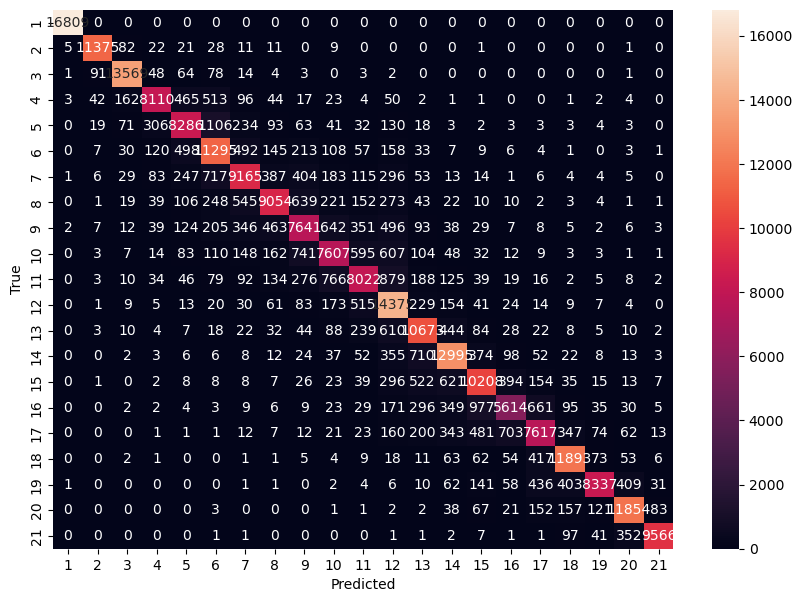

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = selected_features_data.copy()

# Convert datetime columns to numerical features
X['Year'] = X['Date Rptd'].dt.year
X['Month'] = X['Date Rptd'].dt.month
X['Day'] = X['Date Rptd'].dt.day
X['Year_OCC'] = X['DATE OCC'].dt.year
X['Month_OCC'] = X['DATE OCC'].dt.month
X['Day_OCC'] = X['DATE OCC'].dt.day
X = X.drop(columns=['Date Rptd', 'DATE OCC'])  # Drop the original datetime columns

# Define the target variable
y = X['AREA']
X = X.drop('AREA', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_clf.predict(X_test)

# Get unique labels
labels = sorted(y_test.unique())

# Classification Report
print(classification_report(y_test, y_pred, labels=labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Now, we are going to interpret our results. We will start with the Classification Report 

<h3>Classification Report</h3>

The classification report shows the precision, the recall and f1-score for each class along with support (the number of true instances for each label).
From this report we can see that precisoion is really high for most of the classes, especially for the classes 
1,2,19,20 and 21. For these ones, especially, the precision is above 0.98.  Therefore, our model is confident in predicting these classes. 

Other interesting aspect of our report is the recall which varies significantly across our classes. It varies between [0,67, 1.00]. Let's take as example the recall corresponding to the class 4, which is 0.86. This indicates 
that the model correctly predicts this class 86% of the time across all predictions. 

<h3>Confusion Matrix</h3>

Now, we are going to analyse the confusion matrix. The confusion matrix visualizes the performance of the classification model with predictions across the x-axis and actual values along the y-axis. It is really essential 
to mention that the values on the diagonal are the dominant values. This indicates that our model behaves well in predicting most of our classes. Ok, there are still issues regarding the prediction task, for instance there is confusion between classes 8 and 9. If we look, the number of classes predicted as 9, but which are actually 10 is 753, which is really high. There is still room of improvement, perhaps through additional feature engineering or hyper parameter tuning. 

<h3>Were such results expected?</h3>

   To be honest, we expected such good results because of the following reasons : 
   
-> The preprocessing was really comprehensive and repaired all issues of the dataset such that machine learning 
   algorithms can be applied safely. 
-> The second reason is given by the powerful machine learning algorithm that we applied, Random Forest. Having    
   mentioned the great capabilities of Random Forest to work on extremely large feature sets and model complex, 
   non-linear relationships. 
-> Also, the number of attributes (188 in our case) was quite large, so the model has a rich set of features to 
   distinguish the classes effectlively. 
-> Not to forget, these good scores from above happened also due to the robustness to overfitting of the Random 
   Forest algorithm.
 

<h2> Decision Tree Algorithm </h2>

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16809
           2       1.00      1.00      1.00     11566
           3       1.00      1.00      1.00     13878
           4       1.00      1.00      1.00      9540
           5       1.00      1.00      1.00     10420
           6       1.00      1.00      1.00     13187
           7       1.00      1.00      1.00     11733
           8       1.00      1.00      1.00     11393
           9       1.00      1.00      1.00     10519
          10       1.00      1.00      1.00     10290
          11       1.00      1.00      1.00     10745
          12       1.00      1.00      1.00     15767
          13       1.00      1.00      1.00     12353
          14       1.00      1.00      1.00     14780
          15       1.00      1.00      1.00     12387
          16       1.00      1.00      1.00      8320
          17       1.00      1.00      1.00     10078
          18       1.00    

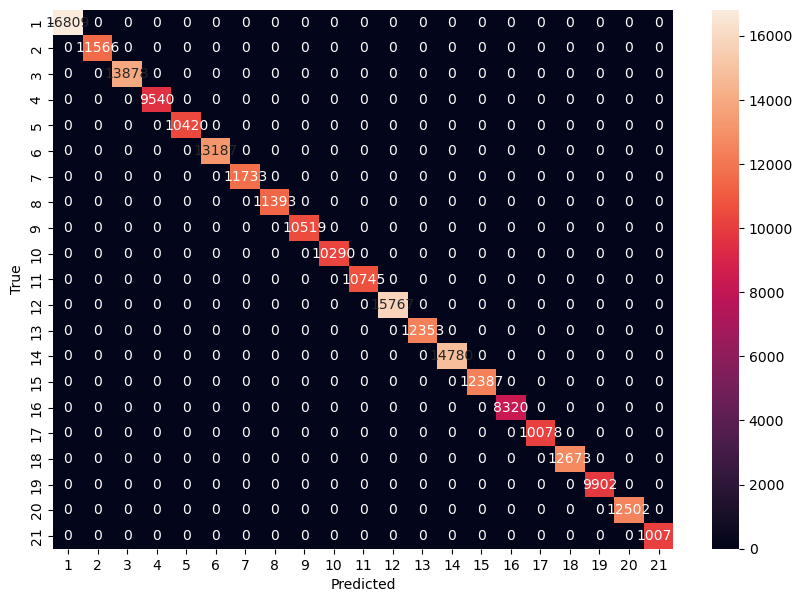

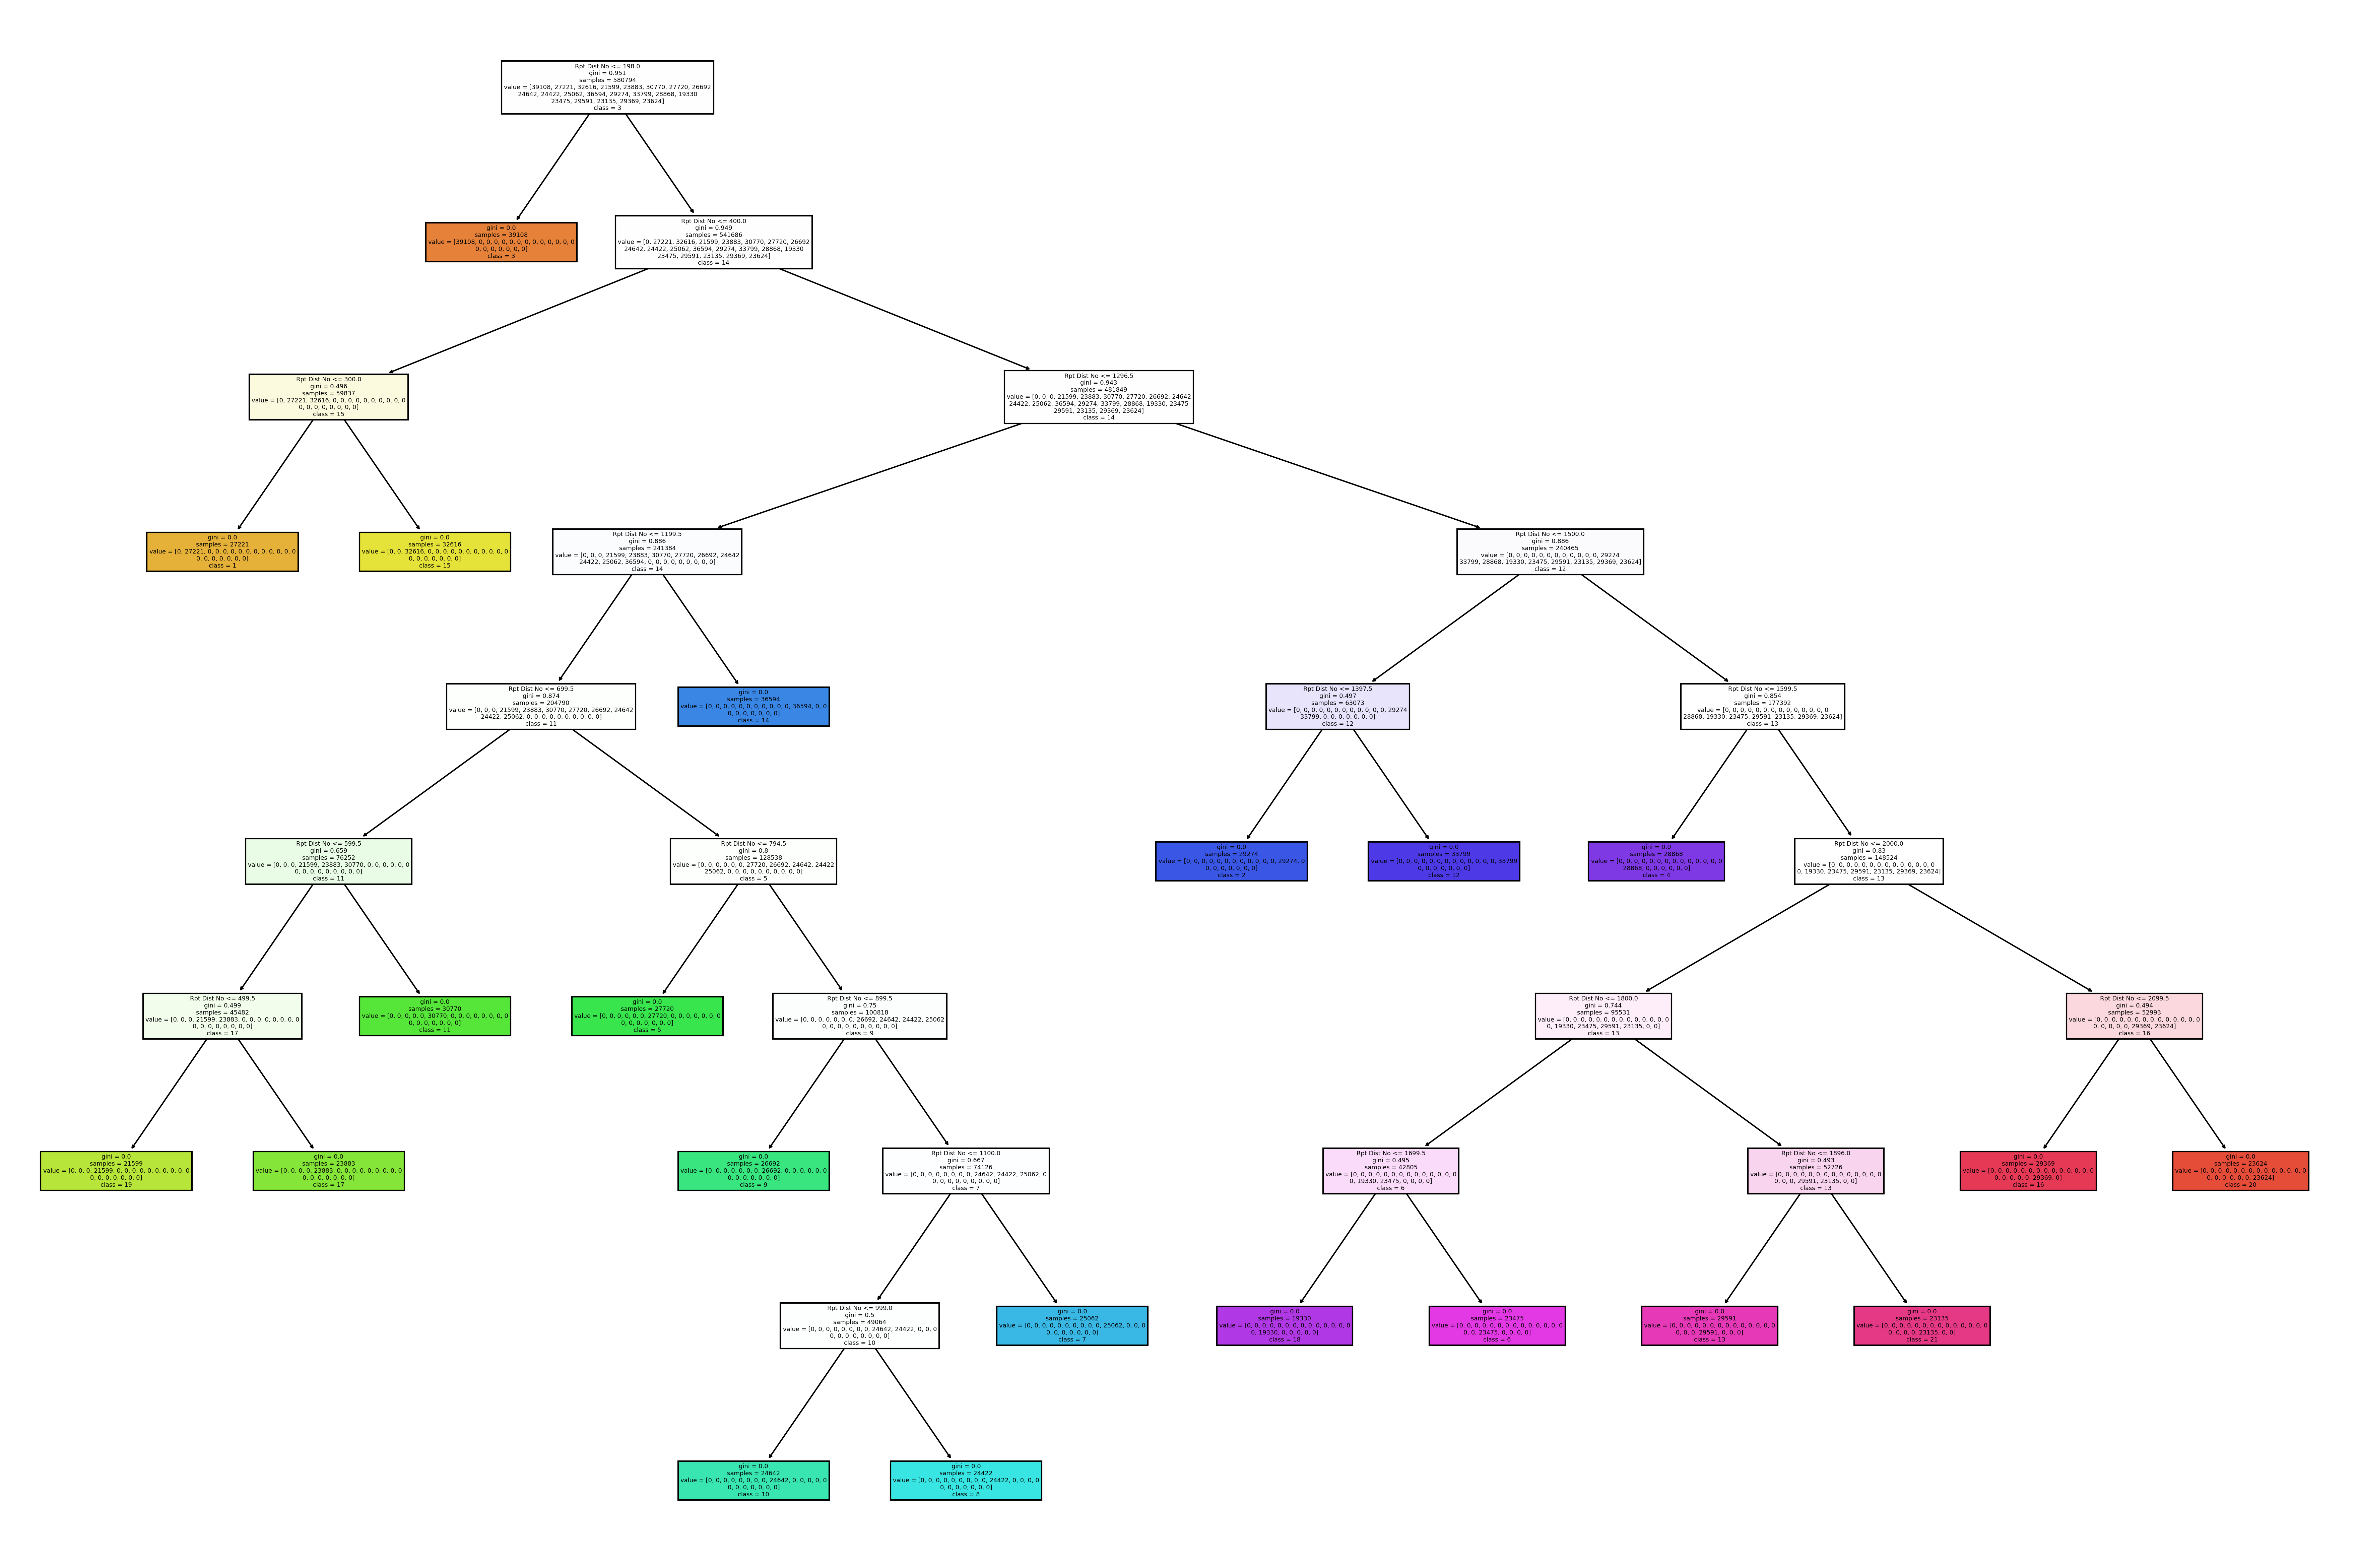

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = selected_features_data.copy()

# Convert datetime columns to numerical features
X['Year'] = X['Date Rptd'].dt.year
X['Month'] = X['Date Rptd'].dt.month
X['Day'] = X['Date Rptd'].dt.day
X['Year_OCC'] = X['DATE OCC'].dt.year
X['Month_OCC'] = X['DATE OCC'].dt.month
X['Day_OCC'] = X['DATE OCC'].dt.day
X = X.drop(columns=['Date Rptd', 'DATE OCC'])  # Drop the original datetime columns

# Define the target variable
y = X['AREA']
X = X.drop('AREA', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = dt_clf.predict(X_test)

# Get unique labels
labels = sorted(y_test.unique())

# Classification Report
print(classification_report(y_test, y_pred, labels=labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert the unique classes to a list of strings
class_names = [str(cls) for cls in y.unique()]

plt.figure(figsize=(30, 20), dpi=300)  # Increase the figure size and DPI as needed
plot_tree(dt_clf, filled=True, feature_names=list(X.columns), class_names=class_names, max_depth= 50)
plt.savefig('decision_tree_high_res.png', format='png', bbox_inches='tight')  # Save to a file
plt.show()


<h2> Reasons for applying Decision Tree </h2>

- 1. Decision Trees are easy to interpret. For such a large dataset that we have chosen, it would have been indicated to take an algorithm so that the prediction of the output is easier to make and understand.

- 2. Decision Trees can capture non-linear relations between features. Our dataset contains 188 features, most of them are quite unrelated to each other. For example the descendance of the victim and the year of the crime occuring are unrelated.

- 3. Decision trees are known for being able to handle very large datasets. Our dataset consists of 188 attributes and >800.000 entries. 

- 4. Decision Trees can easily handle categorical data. The 'AREA' attribute which we want to predict is categorical, the type of crime is also a categorical attribute. Our whole dataset consists mostly of categorical features.



<h2> Classification Report, Confusion Matrix </h2>

From the classification report, we can see that for every class (from 1 to 21) the recall and f1-score are equal to one. That's why in the end, the accuracy is also 1. Here is revealed one of the drawbacks of using Decision-Tree. Its application can lead to overfitting. Therefore, this model would not perform that well on unseen data. 

<h3> Precision </h3> 
The ratio of correctly predicted positive observations to the total predicted positives. A score of 1.00 means there were no false positives; every instance predicted as a given class truly belonged to that class. This is true 
for all the classes from 1 to 21.

<h3> Recall </h3>
A score of 1.00 means there were no false negatives, every instance of a given class was identified correclty. 

<h3> Accuracy </h3> 
Accuracy is the ratio of correclty predicted observation to the total observations. An accuracy of 1.00 means every instance in the test set was correctly classified. 

<h3> Confusion Matrix </h3> 
If we look at our confusion matrix, we can clearly see that values that are not on the first diagonal of the matrix are eqaul to 0, and the diagonal values are greater than 0. This means that there are no False Positives at all, and all the given instances were classified correctly. This is also reflected by the value of the accuracy which is 1. 

<h3> Were such results expected ? </h3> 
Definitely not. In machine learning such scores are very hard to achieve. The provided dataset is a very large one, containing over 800.000 entries with 188 features each. The main reason why such scores were obtained is probably overfitting. Decision Trees are known for the possibility of leading to overfitting. As it tends to concentrate more on the noise of the data, instead on the actual relations between data. With over 800.000 entries, the algorithm has enough resources for training and, therefore the chance of having noise is much higher. 




<h2> Comparison between Random Forest and Decision Tree </h2>

<h3> Main differences between the algorithms </h3>

<h4> The design of the Algorithm </h4>

 Random Forest consists of the application of multiple Decision Trees. It outputs the mean prediction (regression)
or mode of the classes (classification) for each individual tree. Multiple base estimators help increase generalizabilty and robustness. On the other hand, Decision Tree is a single model that makes decisions by splitting nodes into brenches leading to different outcomes. It is simpler and easier to interpret since it consists of only one tree. 

<h4> Capacity to handle Overfitting </h4>

 Random Forest typically has better predictive performance compared to a single decison tree because it reduces the variance without increasing the bias. By taking into account multiple trees, Random Forest can handle overfitting better. On the other hand, Decision Tree can easily overifit data if it is allowed to grow as much as possible with many braches. 

<h4> Efficiency </h4>

 Decision Tree is less computationally-expensive than Random Forest, as Random Forest aggregates multiple trees in its application.



 <h3> Classification Report </h3>
 
 Both algorithms present different precisions. While the second algorithm has a precision of 1 for every assigned class, the Random Forest has slightly lower precisions for the same assigned classes. The only class for which it was obtained a precision of 1 is class 1. This may have occured also because of the significant number of data objects which are assigned with class. Apart from the class 1, all precisions withih Random Forest algorithm are lower than the ones in the Decision Tree algorithm. Hence, it can be seen that there is less bias towards Random Forest. Decision Trees had no restrictions in terms of its growth, so it overifit the data. 
 Moreover, recall is also a signficant indicator in terms of evaluating a model. Decision Tree recorded exactly 0 False Negatives, while Random Forest has registered a significant number of False Positives, especially for classes 
5,5,7,11 and 14. This had a direct consequence on determining the Recall for Random Forest, as these values are lower for most of the classes in comparison with Decision Tree. This is good, as it can be agreed that Random Forest can handle in a better way unseen data.

<h3> Confusion Matrix </h3> 

 The confusion matrixes are very different to each other. As it can be seen, the confusion matrix corresponding to 
the Decision Tree algorithm has non-zero values just on its main diagonal, while the confusion matrix has cells 
different to 0 outside the main diagonal. This results, that some data objects were incorreclty classified by the Random Forest algorithm. For instance, the support for class 4 is 9540, Random Forest 8110 such data objects, whereas the Decision Tree assigned correclty 9540 instances to class 4. So, Random Forest matched correctly around 85% of the data objects with class 4, while the Decision Tree algorithm matched all the corresponding instances with class 4 (100%). Here, it can be observed the bias of the Decision Tree.


    

<h1> Evaluation of the model </h1> 

<h2> Cross Validation performed on Neural Networks </h2> 

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Using a pipeline to standardize data and then fit the model
    pipeline = make_pipeline(StandardScaler(), 
                             MLPClassifier(hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 units each
                                           activation='relu', 
                                           solver='adam',
                                           max_iter=1000, 
                                           early_stopping=True, 
                                           validation_fraction=0.1, 
                                           n_iter_no_change=10, 
                                           tol=0.001))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

average_accuracy = np.mean(accuracies)
print("Average CV Accuracy:", average_accuracy)


Average CV Accuracy: 0.9763627378785668


Cross-validation is a statistical method used to estimate the skill of machine learning models. In cross validation, the data set is divided into k subsets (or "folds"). The model is then trained on k-1 folds, while the remaining fold is used for testing. 

Here our data was split into 5 folds (n_split = 5), with shuffling enabled (shuffle = True). The kf.split(X) method generates indices for splitting the dataset into training and testing sets for each fold. This results in the fact that each data point is used for both training and testing sets for each fold. This is really useful, as the data set used is large, containing also a substancial number of attrbutes. In this way, the patterns between data can be exploited in a more effective way. 

StandardScaler (for feature scaling) and MLPClassifier (the neural network model) are combined to create a pipeline. The MLP uses the ReLU activation function and has 2 hidden layers, each with 10 units. For weight optimisation, the adam solver is used. The use of pipeline in our project helps mantaining a clean, efficient and 
error - free workflow, ensuring that model training and data transformations are applied accurately and consistently during the cross-validation procedure. 

The average Cross-Validation accurracy of approximately 97,63% achieved by the MLPClassifier suggests that the model is performing excellently on the our dataset, with the current preprocessing and hyper parameters such as number of hidden layer, the number of neurons on each such layer and the activation function relu. This high degree of performance is a sign that the model can make accurate predictions on unseen data.




